<a href="https://colab.research.google.com/github/AlejoTechEngineer/API-REST-AprendizajeAutomaticoGoogleColab/blob/main/Laboratorio1AprendizajeAutom%C3%A1tico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Archivos en el directorio: ['.config', 'housing_train.csv', 'sample_data']
Archivo cargado correctamente

VARIABLES NUMÉRICAS 

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.26

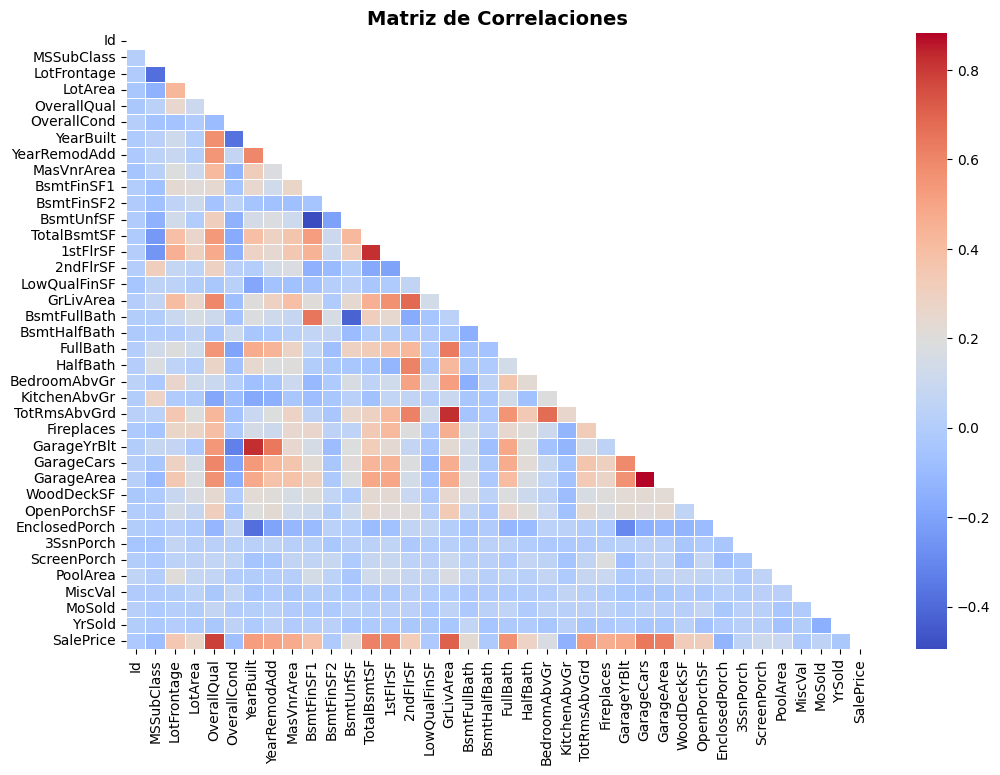



Valores nulos restantes: 880


Árbol de Decisión:
MAE: 28031.83219178082
RMSE: 42735.038520548216 

Random Forest:
MAE: 18183.001187214613
RMSE: 29877.084893646756 

Árbol de Decisión - Accuracy: 1.0
Random Forest - Accuracy: 0.9965753424657534

Reporte de Clasificación Random Forest:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00       263
           3       1.00      0.67      0.80         3

    accuracy                           1.00       292
   macro avg       1.00      0.89      0.93       292
weighted avg       1.00      1.00      1.00       292



In [33]:
import os
import pandas as pd

# Lista los archivos en el directorio actual
print("Archivos en el directorio:", os.listdir())

# Verifica que el archivo realmente existe
file_name = "housing_train.csv"

if file_name in os.listdir():
    df = pd.read_csv(file_name)
    print("Archivo cargado correctamente")
else:
    print(f"No se encontró el archivo '{file_name}'. Verifica el nombre exacto.")

# Ver las primeras filas
df.head()

# Análisis exploratorio de datos
# Calcular estadísticas básicas para variables numéricas
print("\nVARIABLES NUMÉRICAS \n")
print(df.describe())
numeric_stats = df.describe()
print(numeric_stats)


# Variables categóricas: frecuencia de valores
print("\nVARIABLES CATEGÓRICAS \n")
categorical_columns = df.select_dtypes(include=["object"]).columns
for col in categorical_columns:
    print(f"Categoría: {col}")
    print(df[col].value_counts(), "\n")

# Matriz de correlaciones
# Librerías necesarias
import numpy as np  # Asegurar que numpy está importado
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Generar la matriz de correlación con solo valores altos (mayores a 0.5 o menores a -0.5)
correlation_matrix = df.corr(numeric_only=True)

# Máscara para ocultar la parte superior y reducir ruido visual
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Crear el heatmap con opciones mejoradas
sns.heatmap(correlation_matrix, cmap="coolwarm", linewidths=0.5, mask=mask)

# Personalizar título y etiquetas
plt.title("Matriz de Correlaciones", fontsize=14, fontweight="bold")
plt.show()

# Agregar un espacio en la salida de la consola
print("\n")  # Esto agrega dos líneas en blanco

# Tratamiento de valores nulos
# Ver cuántos valores nulos hay por columna
df.isnull().sum().sort_values(ascending=False)
# Estrategia de limpieza
columns_to_drop = ["PoolQC", "MiscFeature", "Alley", "Fence"]
df.drop(columns=columns_to_drop, inplace=True)

df = df.copy()
df["GarageType"] = df["GarageType"].fillna("Sin Garaje")
df["GarageYrBlt"] = df["GarageYrBlt"].fillna(0)
df["GarageFinish"] = df["GarageFinish"].fillna("Sin Garaje")
df["GarageQual"] = df["GarageQual"].fillna("Sin Garaje")
df["GarageCond"] = df["GarageCond"].fillna("Sin Garaje")

bsmt_cols = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"]
for col in bsmt_cols:
    df[col] = df[col].fillna("Sin Sótano")

df["LotFrontage"] = df["LotFrontage"].fillna(df["LotFrontage"].median())
df["Electrical"] = df["Electrical"].fillna(df["Electrical"].mode()[0])
df["FireplaceQu"] = df["FireplaceQu"].fillna("Sin Chimenea")

print("Valores nulos restantes:", df.isnull().sum().sum())
print("\n")

# Aplicar Árboles de Decisión y Random Forest para regresión
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Seleccionar características numéricas para el modelo
df_numeric = df.select_dtypes(include=["number"]).copy()
X = df_numeric.drop(columns=["Id", "SalePrice"])
y = df["SalePrice"]

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Árbol de Decisión
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# Evaluar modelos
def evaluate(y_true, y_pred, model_name):
    from sklearn.metrics import mean_squared_error  # Importación dentro de la función
    print(f"{model_name}:")
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("RMSE:", mean_squared_error(y_true, y_pred) ** 0.5, "\n")


evaluate(y_test, dt_preds, "Árbol de Decisión")
evaluate(y_test, rf_preds, "Random Forest")

# Clasificación del rango de precio
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Crear grupos de precios
def categorizar_precio(price):
    if price <= 100000:
        return 1
    elif 100001 <= price <= 500000:
        return 2
    else:
        return 3

df["PriceCategory"] = df["SalePrice"].apply(categorizar_precio)

# Definir variables de entrada y salida para clasificación
X_class = df_numeric.drop(columns=["Id"])  # No eliminamos 'SalePrice' para clasificación
y_class = df["PriceCategory"]

# Dividir en entrenamiento y prueba
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42
)

# Modelo Árbol de Decisión
dt_class = DecisionTreeClassifier(random_state=42)
dt_class.fit(X_train_class, y_train_class)
dt_class_preds = dt_class.predict(X_test_class)

# Modelo Random Forest
rf_class = RandomForestClassifier(n_estimators=100, random_state=42)
rf_class.fit(X_train_class, y_train_class)
rf_class_preds = rf_class.predict(X_test_class)

# Evaluación
print("Árbol de Decisión - Accuracy:", accuracy_score(y_test_class, dt_class_preds))
print("Random Forest - Accuracy:", accuracy_score(y_test_class, rf_class_preds))
print("\nReporte de Clasificación Random Forest:")
print(classification_report(y_test_class, rf_class_preds))


# Comparación y Conclusión

## Árbol de Decisión
### Rápido, fácil de interpretar.
### Puede sobreajustarse.

## Random Forest
### Mejor precisión, más robusto.
### Más costoso computacionalmente.